## *Importing Modules*

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from mpl_toolkits.basemap import Basemap
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

## *Importing the dataset*

In [249]:
data = pd.read_csv(open("HotelRatings.csv",errors = 'replace',encoding = "UTF-8"))

In [250]:
data

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


####  - Since our main foucs is on US,  let's remove the data which are outside of US

In [251]:
data = data[(data['latitude'] <= 50.0) & (data['latitude'] >= 24.0)& ((data['longitude']<=-65.0) & (data['longitude']>=-122.0))]

# *Data Cleaning*

- Drop unnecessary columns and null values
- Drop Outliers(reviews less than 10 and ratings higher than 8)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30692 entries, 57 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               30692 non-null  object 
 1   categories            30692 non-null  object 
 2   city                  30692 non-null  object 
 3   country               30692 non-null  object 
 4   latitude              30692 non-null  float64
 5   longitude             30692 non-null  float64
 6   name                  30692 non-null  object 
 7   postalCode            30692 non-null  object 
 8   province              30692 non-null  object 
 9   reviews.date          30458 non-null  object 
 10  reviews.dateAdded     30692 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        29922 non-null  float64
 14  reviews.text          30676 non-null  object 
 15  reviews.title     

#### - Since there are two NULL columns(reviews.doRecommend and reviews.id ). Lets drop them

In [253]:
data = data.drop(columns = ['reviews.doRecommend','reviews.id'])

In [254]:
data.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                    0
longitude                   0
name                        0
postalCode                  0
province                    0
reviews.date              234
reviews.dateAdded           0
reviews.rating            770
reviews.text               16
reviews.title            1481
reviews.userCity        15670
reviews.username           34
reviews.userProvince    14393
dtype: int64

- As the data in 'reviews.userCity' and 'userProvince' columns are not necessary for both sentimental analysis or recommender systems and got a lot of null values, I will drop them.
- Furthermore, I will drop the rest of null values.

In [255]:
data = data.drop(columns=['reviews.userCity','reviews.userProvince'],axis=1)

In [256]:
data.isnull().sum()

address                 0
categories              0
city                    0
country                 0
latitude                0
longitude               0
name                    0
postalCode              0
province                0
reviews.date          234
reviews.dateAdded       0
reviews.rating        770
reviews.text           16
reviews.title        1481
reviews.username       34
dtype: int64

In [257]:
data = data.dropna(subset=['reviews.date','reviews.rating','reviews.text','reviews.title','reviews.username'])

In [258]:
data.isnull().sum()

address              0
categories           0
city                 0
country              0
latitude             0
longitude            0
name                 0
postalCode           0
province             0
reviews.date         0
reviews.dateAdded    0
reviews.rating       0
reviews.text         0
reviews.title        0
reviews.username     0
dtype: int64

### Hotels with low quantities of reviews might affect the accuracy. Therefore, I will drop all the hotels with less than 10 reviews.


In [259]:
data.groupby('name')['reviews.text'].count().describe()

count     482.000000
mean       60.327801
std        88.758569
min         1.000000
25%        11.000000
50%        41.500000
75%        75.750000
max      1184.000000
Name: reviews.text, dtype: float64

In [260]:

data_grp_name = data.groupby('name')['reviews.text'].count()
data_less10 = data_grp_name[data_grp_name < 10]
data_less10 = list(data_less10.index)

# Dropping hotels less than 10 reviews
conditions =data[data['name'].isin(data_less10)].index
data = data.drop(conditions)

### Removing Outliers on Review Ratings

Text(0.5, 1.0, 'Distribution of Review Ratings')

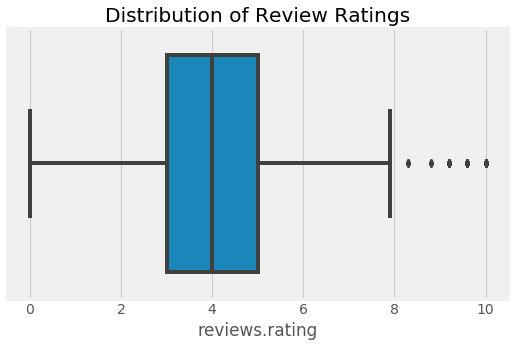

In [261]:
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
sns.boxplot(data['reviews.rating']).set_title('Distribution of Review Ratings')

#### - There are some outliers above ratings of 8. Therfore, in order to have more accurate predictions, I will remove the outliers.

In [262]:
data = data[(data['reviews.rating'] <=8.0) & (data['reviews.rating'] >=0.0)]

### Saving the cleaned dataset into a new csv file for future purpose(sentimental analysis and recommender system)

In [263]:
data.to_csv('cleaned_hotel_dataset.csv')

#### - Now the dataset is clean, let's move on to Exploratory Data Analysis in order to understand the dataset more in depth

# *Exploratory Data Analysis*

### - Let's see the distributions of the reviews all over US

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


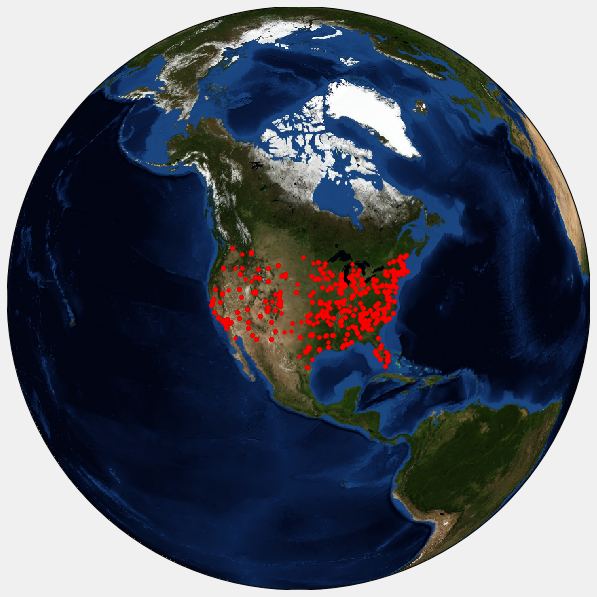

In [264]:

plt.figure(figsize = (10,10))
lat = list(data['latitude'])
lon = list(data['longitude'])
m = Basemap(projection = 'ortho',resolution = None, lat_0 = 40,lon_0 = -100)
x,y = m(lon,lat)
m.bluemarble(scale = 0.5)
m.scatter(x, y, 10, marker='o', color = 'red', zorder=3,alpha = 0.4)

In [265]:
# Lets look deep into it
provinces = data['province'].unique()
fig = go.Figure(data = go.Choropleth(locations = provinces,z = data['province'].value_counts().values,text=data['province'].value_counts().index,locationmode = "USA-states",colorscale = 'viridis', colorbar_title = "Total No. of hotel reviews"))

fig.update_layout(title_text = 'Total Number of Hotel reviews in Each Provinces',geo_scope = 'usa')
fig.show()

####  Lets see the above data in a count plot

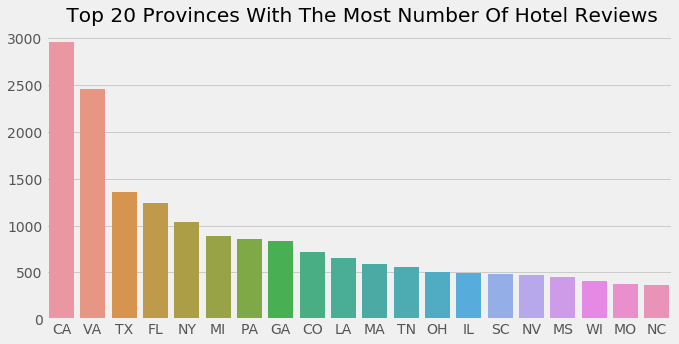

In [266]:
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
plt.title(' Top 20 Provinces With The Most Number Of Hotel Reviews')
sns.barplot(data['province'].value_counts(ascending = False).head(20).index,data['province'].value_counts(ascending = False).head(20).values)

#### - From the observations above, we can see that California had the most number of reviews compare to all other provinces. Let's see the top 10 hotels in California

In [267]:
ca_hotels = pd.DataFrame(data[data['province'] == 'CA']['name'].value_counts().values, index = data[data['province'] == 'CA']['name'].value_counts().index,columns ={'Number of Reviews'} )
ca_hotels.head(10)

,Number of Reviews
Best Western of Long Beach,317
Anaheim Marriott Suites,275
Hotel Valencia Santana Row,197
Sportsmen's Lodge,155
Holiday Inn Express San Clemente,150
Travelodge Anaheim Convention Center,141
Gardena Terrace Inn,131
Simpson House Inn,126
Best Western Plus San Marcos Inn,120
Quality Inn and Suites Irvine Spectrum,119


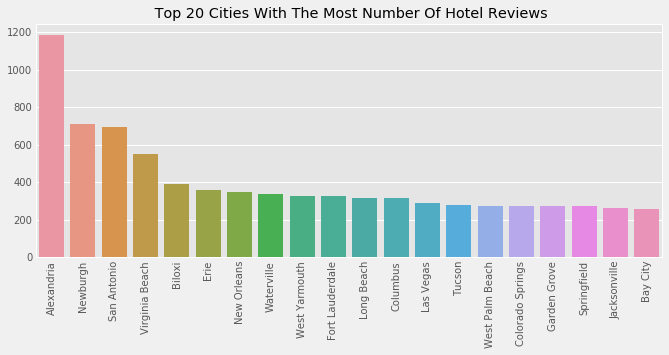

In [268]:
plt.figure(figsize = (10,4))
plt.style.use('ggplot')
plt.title(' Top 20 Cities With The Most Number Of Hotel Reviews')
plt.xticks(rotation = 90)
sns.barplot(data['city'].value_counts(ascending = False).head(20).index,data['city'].value_counts(ascending = False).head(20).values)

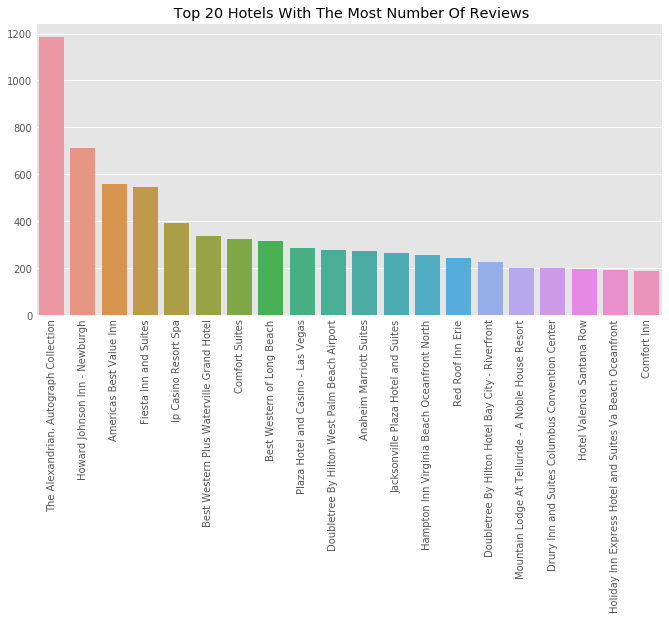

In [269]:
# Let's Most Frequently Appeared Hotel Names
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
plt.title(' Top 20 Hotels With The Most Number Of Reviews')
plt.xticks(rotation = 90)
sns.barplot(data['name'].value_counts(ascending = False).head(20).index,data['name'].value_counts(ascending = False).head(20).values)

#### - Surprisingly, although California had the most number of hotel reviews, there were only few cities of California in the top 20 cities with the most hotel reviews.  Why is it so? Let's see the total number of hotels in the top 5 provinces with the most hotel reviews.

In [270]:
print("Total Number of Hotels In CA were {}".format(data[data['province']=='CA']['name'].nunique()))
print("Total Number of Hotels In VA were {}".format(data[data['province']=='VA']['name'].nunique()))
print("Total Number of Hotels In TX were {}".format(data[data['province']=='TX']['name'].nunique()))
print("Total Number of Hotels In FL were {}".format(data[data['province']=='FL']['name'].nunique()))
print("Total Number of Hotels In NY were {}".format(data[data['province']=='NY']['name'].nunique()))

Total Number of Hotels In CA were 29
Total Number of Hotels In VA were 17
Total Number of Hotels In TX were 18
Total Number of Hotels In FL were 12
Total Number of Hotels In NY were 7


- Despite its comparatively small number of reviews per hotels in California, it could have the most number of reviews as California had relatively more number of hotels than other provinces

### Were the hotels with more reviews have higher average ratings ?

In [271]:
# Grouping by the province and city
province_rating = data.groupby('province')['reviews.rating'].mean().reset_index().head(20)
province_rating = province_rating.sort_values('reviews.rating',ascending = False)
city_rating = data.groupby('city')['reviews.rating'].mean().reset_index().head(20)
city_rating = city_rating.sort_values('reviews.rating',ascending = False)

data_group_hotels = data.groupby('name')['reviews.rating'].mean()
data_group_hotels = data_group_hotels.sort_values(ascending=False)

Text(0.5, 1.0, 'Top 20 Hotels By Ratings On Average')

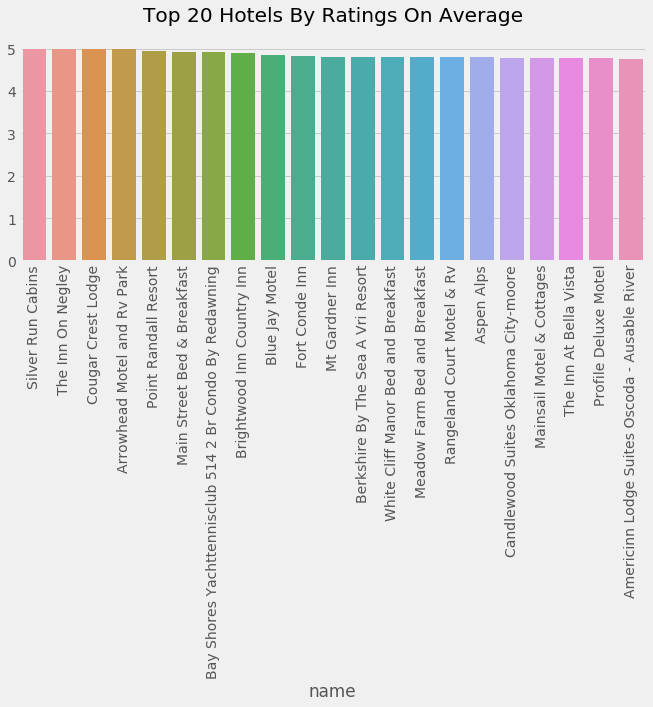

In [272]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,4))
plt.xticks(rotation =90)
plt.ylim(0,5.5)
sns.barplot(data_group_hotels.index[0:21],data_group_hotels.values[0:21]).set_title('Top 20 Hotels By Ratings On Average')

Text(0.5, 1.0, 'Top 20 Provinces with the Highest Average Ratings')

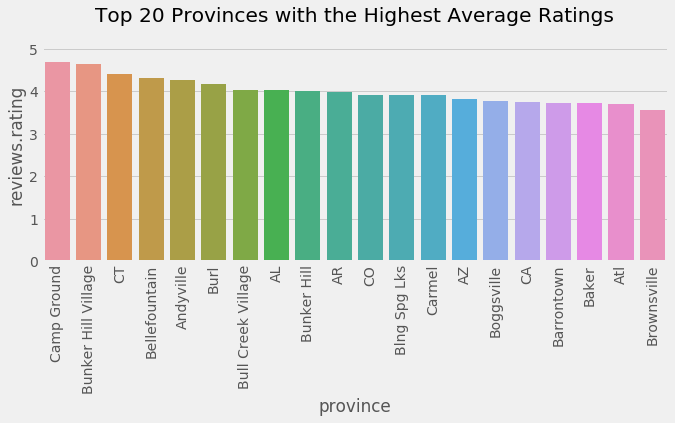

In [273]:
# province with highest ratings

plt.figure(figsize = (10,4))
plt.xticks(rotation =90)
plt.ylim(0,5.5)
sns.barplot(province_rating['province'], province_rating['reviews.rating']).set_title('Top 20 Provinces with the Highest Average Ratings')

Text(0.5, 1.0, 'Top 20 Cities with the Highest Average Ratings')

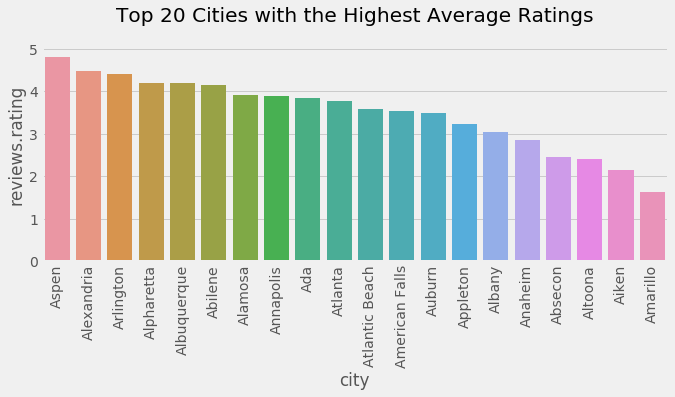

In [274]:
# city with highest ratings
plt.figure(figsize = (10,4))
plt.xticks(rotation =90)
plt.ylim(0,5.5)
sns.barplot(city_rating['city'], city_rating['reviews.rating']).set_title('Top 20 Cities with the Highest Average Ratings')

In [275]:
top20_ratings_list = data_group_hotels.head(20).index
ca_top20_rat_lists = data[data['province'] == 'CA']['name'].isin(top20_ratings_list).value_counts()
va_top20_rat_lists = data[data['province'] == 'VA']['name'].isin(top20_ratings_list).value_counts()
tx_top20_rat_lists = data[data['province'] == 'TX']['name'].isin(top20_ratings_list).value_counts()
print(ca_top20_rat_lists)
print(va_top20_rat_lists)
print(tx_top20_rat_lists)

False    2964
Name: name, dtype: int64
False    2456
Name: name, dtype: int64
False    1362
Name: name, dtype: int64


In [276]:
hotel_counts = data.groupby('name')['reviews.rating'].count()
hotel_ratings = data.groupby('name')['reviews.rating'].mean()
print("The correlation between number of hotel reviews and average ratings is {} ".format(hotel_ratings.corr(hotel_counts)))

The correlation between number of hotel reviews and average ratings is -0.04308357484056237 


 - From these observations, we can notice that none of the hotels in CA,VA,TX(Top 3 provinces with the most reviews) were in the top 20 hotel lists with the highest review ratings. Furthermore, CA ranked the 16th province with the highest average ratings and VA and TX were not even in the top 20.Hence, we can state that the high number of hotel reviews does not mean that it will have higher ratings.

### - Which type of hotels that the customers used the most?

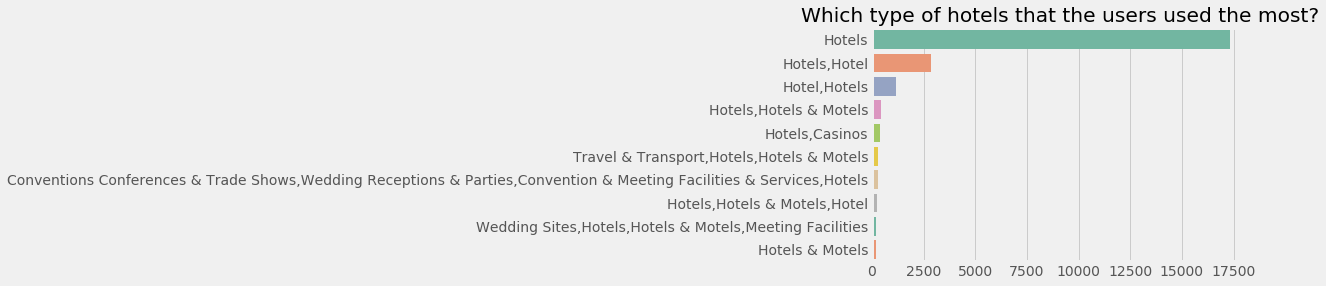

In [277]:
plt.title('Which type of hotels that the users used the most?')
sns.barplot(data['categories'].value_counts().head(10).values,data['categories'].value_counts().head(10).index,palette='Set2')

### - Distribution of ratings on the top 20 provinces with the most reviews

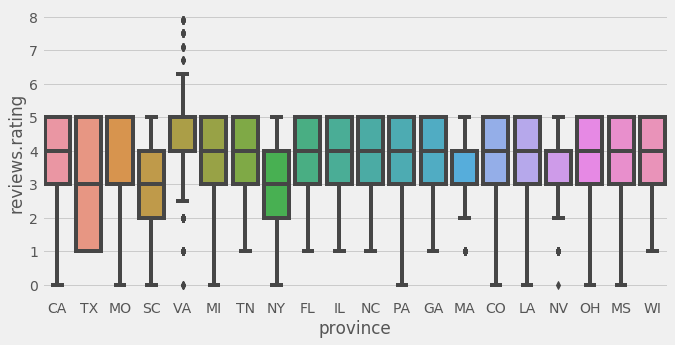

In [278]:
plt.figure(figsize=(10,5))
top20_province = data.loc[(data['province'].isin(data['province'].value_counts(ascending = False).head(20).index.values))]

sns.boxplot(top20_province['province'],top20_province['reviews.rating'])

### - Distribution of ratings on Top 20 cities with themost reviews

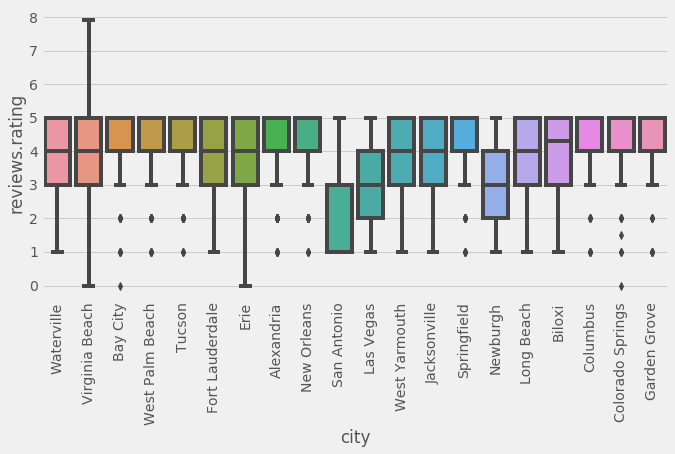

In [279]:
plt.figure(figsize=(10,5))
city_top20 = data.loc[(data['city'].isin(data['city'].value_counts(ascending = False).head(20).index.values))]
plt.xticks(rotation = 90)
sns.boxplot(city_top20['city'], city_top20['reviews.rating'])

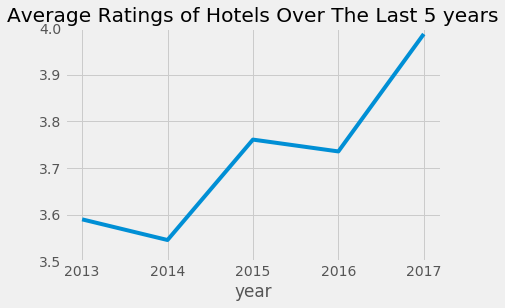

In [280]:
data['reviews.date'] = pd.to_datetime(data['reviews.date'])
data['year'] = data['reviews.date'].dt.year
data_group_year = data.groupby('year')['reviews.rating'].mean()
g = sns.lineplot(data_group_year.index[11:],data_group_year.values[11:])
plt.ylim(3.5,4)
plt.title('Average Ratings of Hotels Over The Last 5 years')
g.set_xticks([2013,2014,2015,2016,2017])

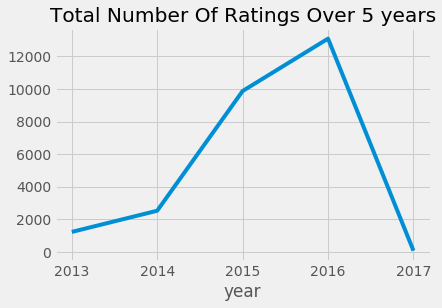

In [281]:
data_group_year2 = data.groupby('year')['reviews.text'].count()
g = sns.lineplot(data_group_year2.index[11:],data_group_year2.values[11:])
plt.title('Total Number Of Ratings Over 5 years')
g.set_xticks([2013,2014,2015,2016,2017])

- The Average ratings had increased over the 5 years by around 0.4 on average.
- The total number of reviews increased signifcantly until 2016.However, it dropped dramatically again after one year.

### - Rating distribution from 2013 to 2017

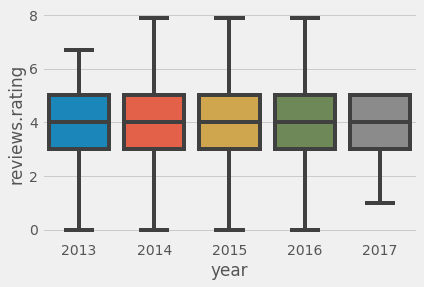

In [282]:

data_5years = data.loc[(data['year'].isin([2013,2014,2015,2016,2017]))]
sns.boxplot(x = data_5years['year'],y = data_5years['reviews.rating'] )

#### - From the distribution graph, we can point out the over that five years, the interquartile range had stayed constantly. Based on this result, we can also deduce that the ratings for most of the hotels had not changed much.

### I will consider hotels with more than 4 ratings score as 'Nicely Rated Hotels' and below 4 as 'Poorly Rated Hotels'. Here are the wordclouds to describe the hotels according to their categories

In [283]:
# Wordcloud on Good ratings and bad ratings
data_goodrat = data[data['reviews.rating'] >= 4.0]
data_badrat = data[data['reviews.rating'] < 4.0]

wordcloud_good = WordCloud(width = 500,height = 500,background_color = 'black',stopwords=set(STOPWORDS)).generate(" ".join(data_goodrat['reviews.title'].values))
wordcloud_bad = WordCloud(width = 500,height = 500,background_color = 'black',stopwords=set(STOPWORDS)).generate(" ".join(data_badrat['reviews.title'].values))


### - Wordcloud of Nicely Rated Hotels

(-0.5, 499.5, 499.5, -0.5)

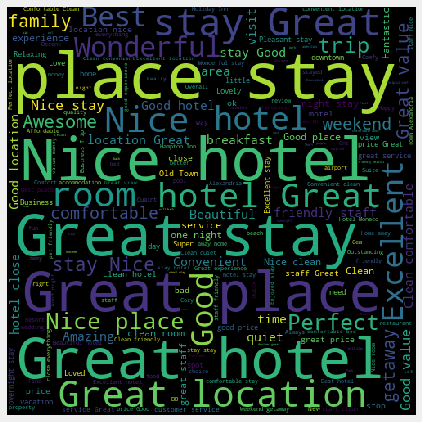

In [284]:
plt.figure(figsize=(7,7))
plt.imshow(wordcloud_good)
plt.axis('off')


### - Wordcloud of poorly Rated Hotels

(-0.5, 499.5, 499.5, -0.5)

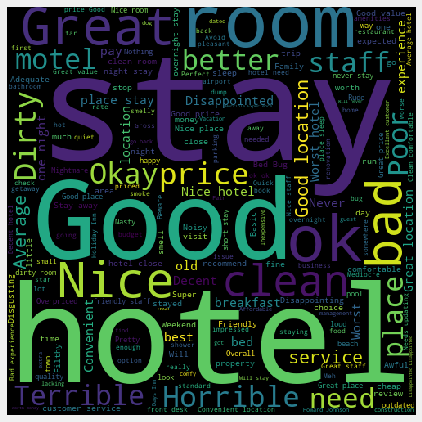

In [285]:
plt.figure(figsize=(7,7))
plt.imshow(wordcloud_bad)
plt.axis('off')

- Even the ratings were lower, there were still some hotels rated with positive reviews, such as 'Good','Great' or 'ok'.

## Review Texts and Title Length On Histrogram

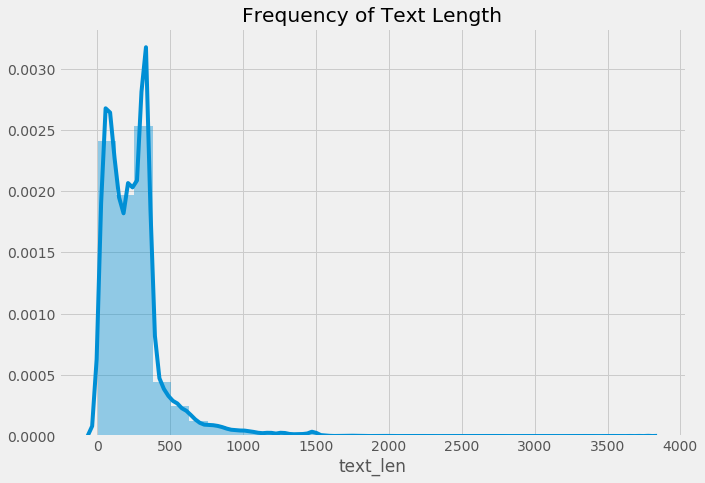

In [286]:

data['text_len'] = data['reviews.text'].apply(lambda x : len(x))
data['title_len'] = data['reviews.title'].apply(lambda x : len(x))

plt.figure(figsize=(10,7))
plt.title('Frequency of Text Length')
sns.distplot(data['text_len'],bins=30)


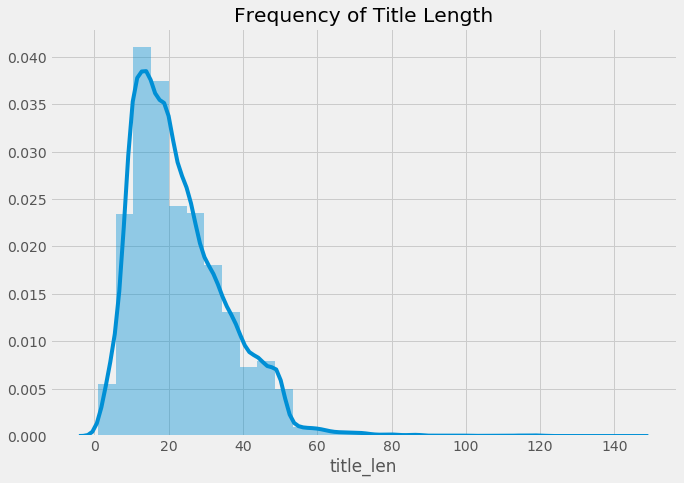

In [287]:
plt.figure(figsize=(10,7))
plt.title('Frequency of Title Length')
sns.distplot(data['title_len'],bins=30)


Text(0.5, 1.0, 'Distribution of Title Length of each Review Ratings')

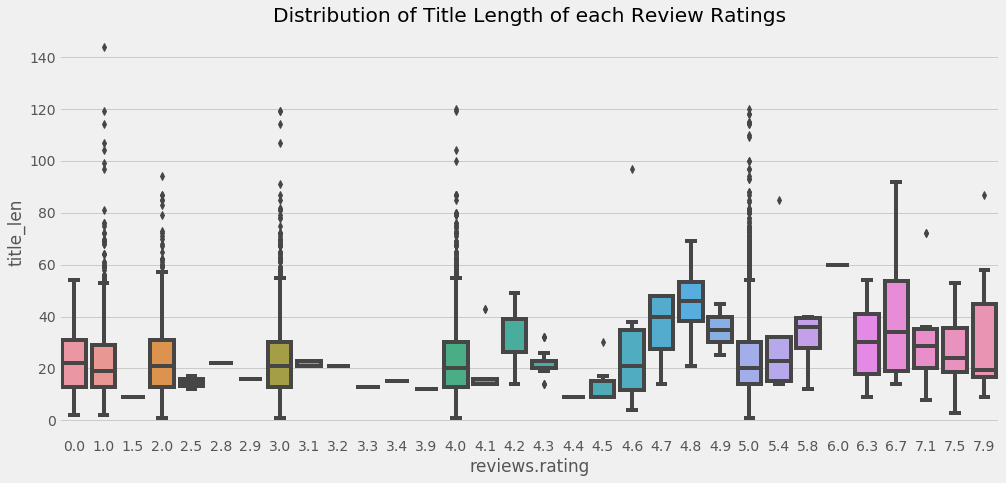

In [288]:
plt.figure(figsize = (15,7))
sns.boxplot(data['reviews.rating'],data['title_len']).set_title('Distribution of Title Length of each Review Ratings')


Text(0.5, 1.0, 'Distribution of Text Length of each Review Ratings')

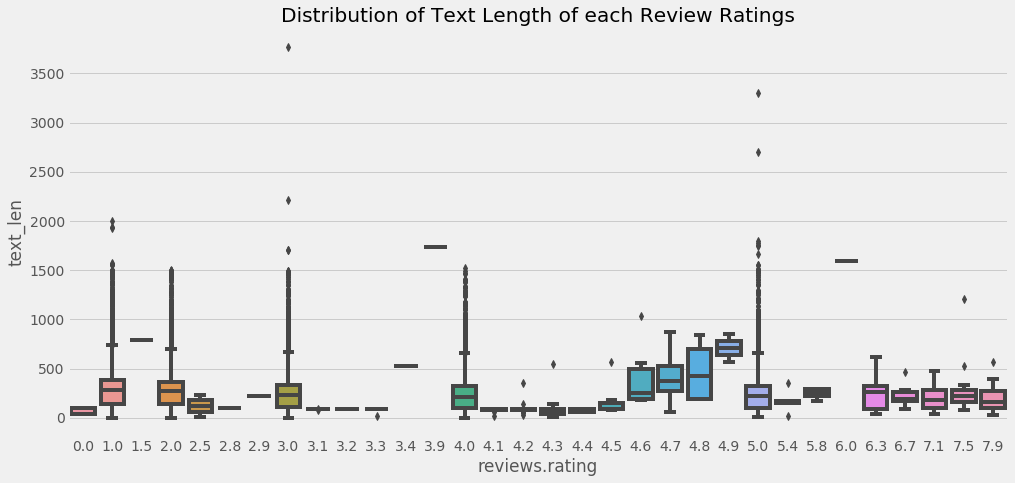

In [289]:
plt.figure(figsize = (15,7))
sns.boxplot(data['reviews.rating'],data['text_len']).set_title('Distribution of Text Length of each Review Ratings')


- From these graphs, we can see that the hotels with higher ratings had longer title length. On the other hand, the majority of the hotels with higher ratings(above 6.0) had shorter text length. Does it mean that longer the reviews(both text and  title) not necessarily better? Let's explore the correlation heatmap to get more clear view on this.

## Correlation Heatmap

Text(0.5, 1, 'Correlation Heatmap On The Dataset')

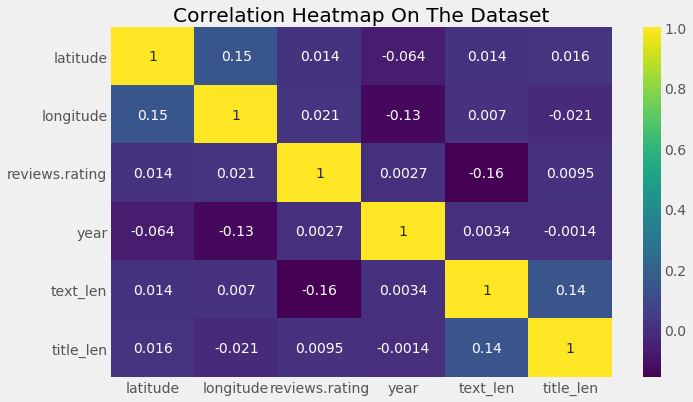

In [290]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='viridis',annot=True).set_title('Correlation Heatmap On The Dataset')

- Review ratings had slight negative correlation with the text length. Also, ratings had a very weak positive correlation with the title length. From this observation, we can deduce that longer the review not necessarily have higher ratings.

## End Of EDA!